# Aprendendo Sintaxe do Pytorch

In [1]:
import torch

tns = torch.randn(9, 12)
tns1 = tns[0:5, 0:4]
tns2 = tns[5:, 4:]

resultado = torch.mm(tns1, tns2)
print(resultado.size())
     


torch.Size([5, 8])


Assim como o NumPy, o Pytorch √© uma biblioteca de processamento vetorial/matricial/tensorial. Opera√ß√µes sobre os tensores do Pytorch possuem sintaxe consideravelmente parecida com opera√ß√µes sobre tensores do NumPy.

Para mais informa√ß√µes sobre tensores em PyTorch, consulte a documenta√ß√£o:
https://pytorch.org/docs/stable/tensors.html

## Tipos de tensores

Voc√™ pode criar tensores do PyTorch de in√∫meras formas! Vamos ver primeiro os tipos de tensores que est√£o ao nosso dispor. Para isso, vamos converter listas comuns do Python em tensors do PyTorch.

Note que a impress√£o de tensores dos tipos float32 e int64 n√£o v√™m acompanhadas do par√¢metro de tipo dtype, visto que se tratam dos tipos padr√£o trabalhados pelo PyTorch.

In [2]:
import torch
lista = [ [1,2,3],
          [4,5,6] ]

tns = torch.Tensor(lista)
print(tns.dtype)
print(tns)

print('')

tns = torch.DoubleTensor(lista)
print(tns.dtype)
print(tns)

print('')
tns = torch.LongTensor(lista)
print(tns.dtype)
print(tns)

     

torch.float32
tensor([[1., 2., 3.],
        [4., 5., 6.]])

torch.float64
tensor([[1., 2., 3.],
        [4., 5., 6.]], dtype=torch.float64)

torch.int64
tensor([[1, 2, 3],
        [4, 5, 6]])


## Outras formas de instanciar tensores

A partir de arrays Numpy <br>
*torch.from_numpy(arr)*

In [3]:
import numpy as np

arr = np.random.rand(3,4)
arr = arr.astype(int)
print(arr)
print(arr.dtype)

print('')
tns = torch.from_numpy(arr)
print(tns)
print(tns.dtype)

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
int32

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.int32)
torch.int32


## Tensores inicializados

Essas fun√ß√µes recebem como par√¢metro o tamanho de cada dimens√£o do tensor. Aqui vamos conhecer as seguintes fun√ß√µes:

torch.ones() -> Cria um tensor preenchido com zeros.

torch.zeros() -> Cria um tensor preenchido com uns.

torch.randn()-> Cria um tensor preenchido com n√∫meros aleat√≥rios a partir de uma distribui√ß√£o normal.

In [4]:
tns1 = torch.ones(2, 3)
tns0 = torch.zeros(3, 5)
tnsr = torch.randn(3, 3)

print(tns1)
print(tns0)
print(tnsr)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
tensor([[-0.8716, -0.6276,  0.0719],
        [-0.9225, -0.1165, -0.9281],
        [-1.0212, -0.0409,  0.3517]])


## Transformar um tensor para um array em numpy

In [5]:
arr = tnsr.data.numpy()
print(arr)     

[[-0.8716218  -0.6276122   0.07189906]
 [-0.92245936 -0.11654707 -0.92810756]
 [-1.0212265  -0.04092501  0.35165378]]


## Indexa√ß√£o

De posse dessa informa√ß√£o, a indexa√ß√£o √© feita de forma similar a arrays Numpy, atrav√©s da sintaxe de colchetes [].

In [6]:
# tnsr[0,1]
print(tnsr[0:2, 2].data.numpy())
print(tnsr[0, 1].item())

[ 0.07189906 -0.92810756]
-0.6276121735572815


## Opera√ß√µes com tensores

A fun√ß√£o .item() utilizada anteriormente extrai o n√∫mero de um tensor que possui um √∫nico valor, permitindo realizar as opera√ß√µes num√©ricas do Python. Caso o item n√£o seja extra√≠do, opera√ß√µes que envolvam tensores v√£o retornar novos tensores.

Vale ressaltar tamb√©m que opera√ß√µes entre tensores s√£o realizadas ponto a ponto, operando cada elemento (i, j) do tensor t1, com o elemento (i, j) do tensor t2.


In [7]:
tns1 = torch.randn(2,2,3)
tns2 = torch.ones(2,2,3)

print(tns1)
print(tns2)

print('')

print(tns1*tns2)
     


tensor([[[ 0.2079,  0.4077,  0.0889],
         [ 0.8412,  0.6347,  0.6848]],

        [[-0.0747,  0.5451,  0.4365],
         [ 0.7928,  0.3592, -0.3479]]])
tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])

tensor([[[ 0.2079,  0.4077,  0.0889],
         [ 0.8412,  0.6347,  0.6848]],

        [[-0.0747,  0.5451,  0.4365],
         [ 0.7928,  0.3592, -0.3479]]])


## Fun√ß√£o .size() e .view()

Uma opera√ß√µes important√≠ssima na manipula√ß√£o de tensores para Deep Learning √© a reorganiza√ß√£o das suas dimens√µes. Dessa forma podemos, por exemplo, linearizar um tensor n-dimensional.

In [8]:
print(tns2.size())

print(tns2.view(tns2.size(0), -1))

torch.Size([2, 2, 3])
tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])


## GPU Cast

Para que o seu script d√™ suporte a infraestruturas com e sem GPU, √© importante definir o dispositivo no in√≠cio do seu c√≥digo de acordo com a verifica√ß√£o apresentada a seguir. Essa defini√ß√£o de dispositivo ser√° utilizada toda vez que precisarmos subir valores na GPU, como os pesos da rede, os gradientes, etc.


In [9]:
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')
  
print(device)
tns2 = tns2.to(device)
print(tns2)
     


cpu
tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])


# Camada Linear

Vamos come√ßar importando o m√≥dulo nn e o torch

In [10]:
import torch
from torch import nn # neural networks   

Agora vamos instanciar nossa camada linear, com uma entrada de dimensionalidade d = 3 e a sa√≠da de tamanho 1, j√° que estamos instanciando um perceptron simples.

Qualquer d√∫vida, a documenta√ß√£o est√° logo ali ;)
https://pytorch.org/docs/stable/nn.html#torch.nn.Linear


In [11]:
torch.manual_seed(42)

perceptron = nn.Linear(3, 1)
print(perceptron)

Linear(in_features=3, out_features=1, bias=True)


Segue ent√£o o mesmo modelo classico do perceptron ![](https://camo.githubusercontent.com/00dc8876a8ccd7915e8d256d462bcd9a6011c72b0d44483f4cc6d5ee1252c95c/68747470733a2f2f64726976652e676f6f676c652e636f6d2f75633f6578706f72743d766965772669643d314164316e4b554738756a565779734f61754b597a4f68686d5232365a6c367943)
<br>
Os pesos W e o vi√©s b s√£o inicializados aleatoriamente pelo pytorch. Podemos consultar essa informa√ß√£o de duas formas:

- iterando em seus named_parameters
- acessando cada par√¢metro individualmente atrav√©s do seu nome padr√£o.


In [12]:
for nome, tensor in perceptron.named_parameters():
  print(nome, tensor.data)
  
print('')
print(perceptron.weight.data)
print(perceptron.bias.data)
     

weight tensor([[ 0.4414,  0.4792, -0.1353]])
bias tensor([0.5304])

tensor([[ 0.4414,  0.4792, -0.1353]])
tensor([0.5304])


In [13]:
w1, w2, w3 = perceptron.weight.data.numpy()[0]
b = perceptron.bias.data.numpy()

# w1 * x1 + w2 * x2 + w3 * x3 + b = 0
     

√â importante n√£o se esquecer que no perceptron esses valores definem um hiperplano no espa√ßo. Como 3 dimens√µes est√° no limite da nossa capacidade de visualiza√ß√£o, vamos aproveitar esse momento para visualizar o plano aleatoriamente inicializado pelo torch.

Para isso, usaremos aqui a biblioteca de visualiza√ß√£o matplotlib, com o toolkit de plot 3D.
Mais informa√ß√µes em: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#mpl_toolkits.mplot3d.Axes3D.plot_surface

Para se inspirar: https://stackoverflow.com/questions/48335279/given-general-3d-plane-equation-how-can-i-plot-this-in-python-matplotlib


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot3d(perceptron):
    w1, w2, w3 = perceptron.weight.data.numpy()[0]
    b = perceptron.bias.data.numpy()

    X1 = np.linspace(-1, 1, 10)
    X2 = np.linspace(-1, 1, 10)

    X1, X2 = np.meshgrid(X1, X2)
    X3 = (b - w1 * X1 - w2 * X2) / w3

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')  # Use add_subplot for older versions
    ax.view_init(azim=180)

    ax.plot_surface(X1, X2, X3, cmap='plasma', alpha=0.5)

    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')

    plt.title('Perceptron Decision Boundary in 3D')
    plt.show()
  
     


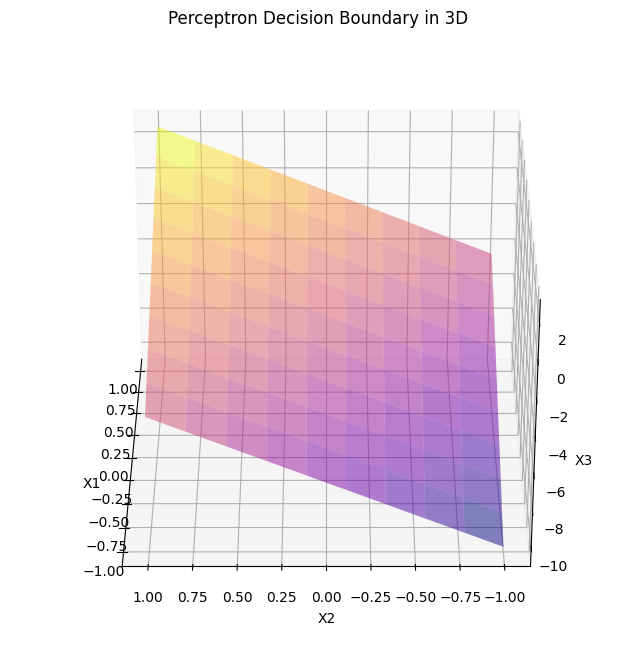

In [15]:
plot3d(perceptron)

# Forward

O fluxo da informa√ß√£o de entrada atrav√©s da rede recebe o nome de forward, j√° que a informa√ß√£o √© passada para a frente. Vamos ent√£o realizar o forward da nossa rede de um homem pereptron s√≥. Para isso, basta realizar uma chamada de fun√ß√£o com a vari√°vel onde instaciamos a camada Linear.



## Fizemos anteriormente a inst√¢ncia da camada
linear = nn.Linear(in_features=3, out_features=1)

## Para realizar o forward
y = linear(X)


tensor([0.7391], grad_fn=<AddBackward0>)


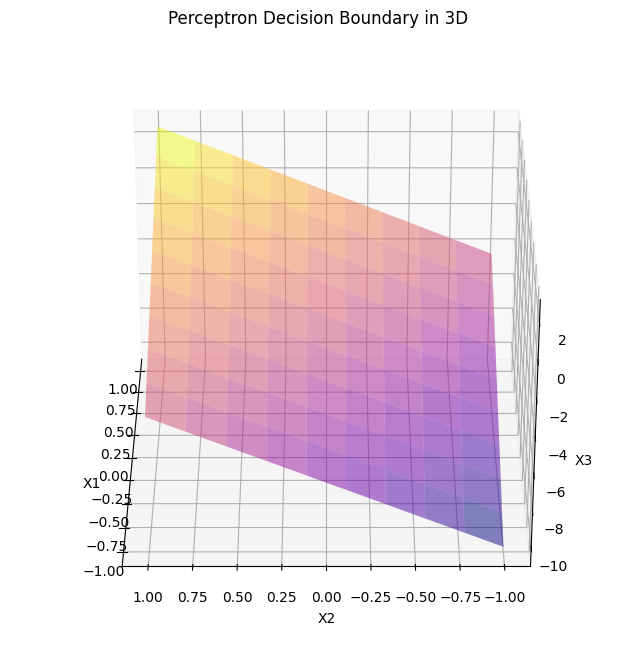

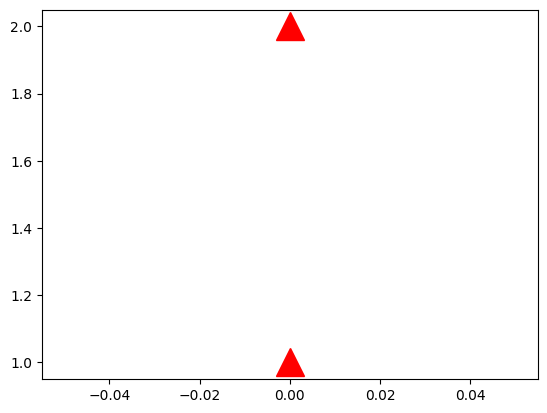

In [16]:
X = torch.Tensor([0, 1, 2])
y = perceptron(X)

print(y)

plot3d(perceptron)
plt.plot([X[0]], [X[1]], [X[2]], color='r', marker='^', markersize=20)
     

# Classifica√ß√£o Linear

A equa√ß√£o da reta √© aprendida na forma $ax + by + c$, mas para nos adequarmos √†s nomenclaturas de redes neurais, podemos reescrever essa equa√ß√£o como ${w_1x_1 + w_2x_2 + b}$. Ou seja, ${w_1}$, ${w_2}$ e ${b}$ s√£o os par√¢metros que definem o nosso **modelo linear**, a nossa reta.<br>Vamos come√ßar realizando o plot de uma reta espec√≠fica:,${-1x_1 + 4x_2 + 0.4}$

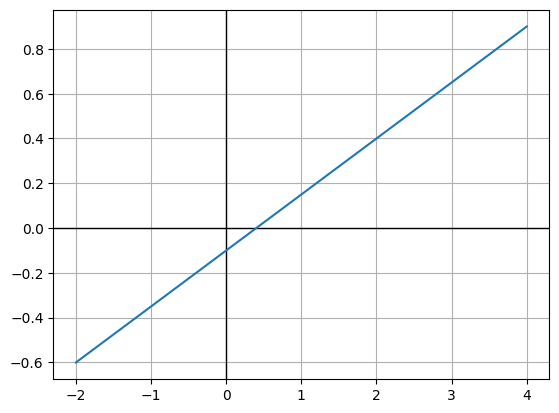

In [17]:
import numpy as np
import matplotlib.pyplot as plt

a = -1
b = 4
c = 0.4

# ax + by + c = 0
# y = (-a*x -c)/b
def plotline(a, b, c):
  x = np.linspace(-2, 4, 50)
  y = (-a*x -c)/b

  plt.axvline(0, -1, 1, color='k', linewidth=1)
  plt.axhline(0, -2, 4, color='k', linewidth=1)
  plt.plot(x, y)
  plt.grid(True)
  
plotline(a, b, c)
     


## Solucionando a equa√ß√£o da reta para diferentes pontos

A seguir vamos selecionar tr√™s pontos no espa√ßo, e soucionar a equa√ß√£o da reta para esses pontos.


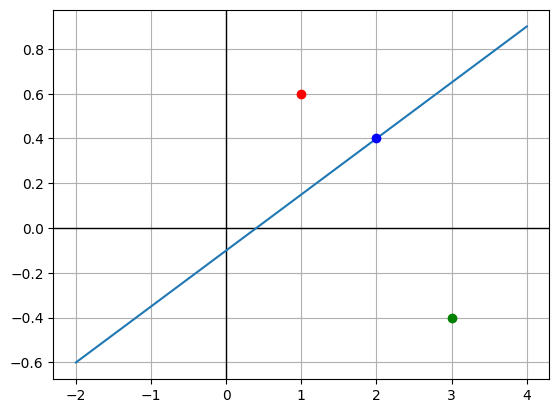

In [18]:
p1 = (2, 0.4)
p2 = (1, 0.6)
p3 = (3, -0.4)

plotline(a,b,c)
plt.plot(p1[0], p1[1], color='b', marker='o')
plt.plot(p2[0], p2[1], color='r', marker='o')
plt.plot(p3[0], p3[1], color='g', marker='o')

In [19]:
ret1 = a*p1[0] + b*p1[1] + c
print("%.2f" % ret1)

ret2 = a*p2[0] + b*p2[1] + c
print("%.2f" % ret2)

ret3 = a*p3[0] + b*p3[1] + c
print("%.2f" % ret3)
     

0.00
1.80
-4.20


Note que o ponto <font color='blue'>$p_1$</font> est√° na reta, enquanto <font color='red'>$p_2$</font> est√° acima da reta e <font color='green'>$p_3$</font> abaixo. Ao solucionar a equa√ß√£o da reta para esses tr√™s pontos, tivemos respectivamente resultados <font color='blue'>nulo $(=0)$</font>, <font color='red'>positivo $(>0)$</font> e <font color='green'>negativo $(<0)$</font>.

Esse comportamento √© consistente para quaisquer pontos na reta, acima ou abaixo dela. Ou seja, se chamarmos a equa√ß√£o da reta de $f(x)$, temos as seguintes regras:

* <font color='blue'>$f(x) = 0$</font> define pontos na reta
* <font color='red'>$f(x) > 0$</font> define pontos acima da reta
* <font color='green'>$f(x) < 0$</font> define pontos abaixo da reta


# Modelo Linear

Nossa reta pode ser interpretada como um modelo linear, que nada mais √© do que uma **fun√ß√£o de mapeamento** $X \rightarrow Y$, que mapeia cada ponto em $X$ para um ponto em $Y$. Em outras palavras, dados os par√¢metros $W = \{w_1, w_2\}$ e $b$ de uma reta, √© poss√≠vel mapear uma entrada $X = \{x_1, x_2\}$ para a sa√≠da $f(x; W, b)$.

Para problemas de classifica√ß√£o, os valores de $y$ para novas entradas $x$ v√£o definir se $x$ √© um ponto <font color='red'>acima</font> ou <font color='green'>abaixo</font> da reta, formando portanto um classificador capaz de **separar linearmente problemas com duas classes**.

<img src="https://drive.google.com/uc?export=view&id=18Emd5S0LxY_-6_oqOW_1oBztomJGuRfF" width="500">


## Regra Geral

Formalizando a nomenclatura de redes neurais, em duas dimens√µes $(x_1, x_2)$ nosso modelo linear tem dois **pesos** $(w_1, w_2)$ e um **vi√©s** $b$, que em ingl√™s s√£o chamados de **w**eight e **b**ias. 

Em duas dimens√µes nosso modelo forma uma reta, como vimos anteriormente. Para um n√∫mero de dimens√µes $d > 2$, modelos lineares s√£o chamados de **hiperplanos**, e s√£o compostos por:
* um peso $w_i$ para cada dimens√£o $x_i$. 
* um √∫nico vi√©s $b$

Exemplo, para 3 dimens√µes $(x_1, x_2, x_3)$ ter√≠amos tr√™s pesos $(w_1, w_2, w_3)$ e um √∫nico vi√©s $b$. Sua fun√ß√£o de mapeamento seria $y = w_1x_1 + w_2x_2 + w_3x_3 + b$
 
De forma geral, define-se que dada uma entrada com $d$ dimens√µes, a fun√ß√£o de mapeamento de um modelo linear √© $$y = \sum^{d}_{i=1}w_ix_i + b$$



## Exerc√≠cio Sugerido

**Vamos treinar um classificador linear em duas dimens√µes usando a tecnologia mais avan√ßada que existe: o seu c√©rebro!**

A c√©lula a seguir produz uma distribui√ß√£o aleat√≥ria para um problema de classifica√ß√£o com duas classes, usando a fun√ß√£o ```make_classification()``` do sklearn. <br>
Documenta√ß√£o: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

0


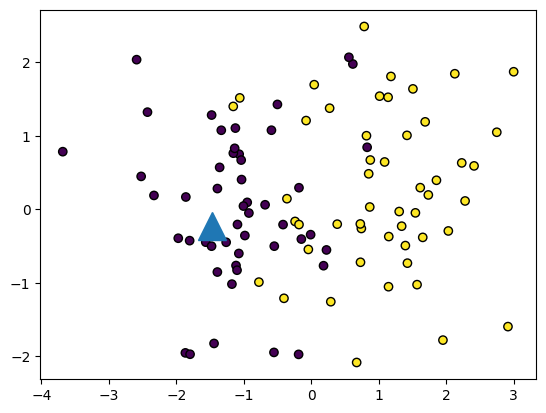

In [20]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(46)

X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
           edgecolor='k')

p = X[10]
print(Y[10])
plt.plot(p[0], p[1], marker='^', markersize=20)

**Seu trabalho √©** encontrar os melhores par√¢metros $(W, b)$ de um modelo linear para classificar a distribui√ß√£o gerada. 

O ideal √© **n√£o** fazer por tentativa e erro, mas prestar aten√ß√£o no impacto de cada mudan√ßa realizada. Note que os pesos $W$ s√£o componentes angulares do seu modelo, enquanto o vi√©s $b$ √© o componente linear que desloca a reta no espa√ßo.


-4.4


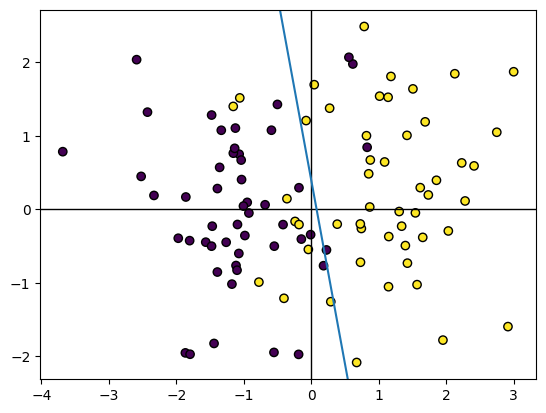

In [21]:
def plotmodel(w1, w2, b):
  
  plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
           edgecolor='k')
  
  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax = plt.gca().get_ylim()
  
  x = np.linspace(-2, 4, 50)
  y = (-w1*x -b)/w2

  plt.axvline(0, -1, 1, color='k', linewidth=1)
  plt.axhline(0, -2, 4, color='k', linewidth=1)
  plt.plot(x, y, label='_nolegend_')
  
  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)
  
w1 = 5 #a
w2 = 1  #b
b  = -0.4  #c
plotmodel(w1, w2, b)

p = (-1, 1)
print(w1 * p[0] + w2 * p[1] + b)

Agora podemos utilizar o nosso modelo como um classificador linear com um simples **```if```** para avaliar a solu√ß√£o da equa√ß√£o da reta para novos pontos no espa√ßo.

1 yellow


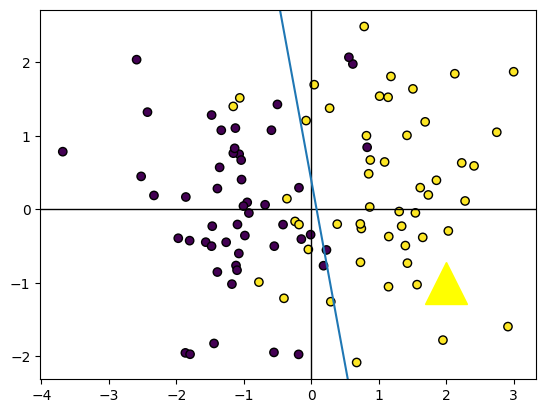

In [22]:
def classify(ponto, w1, w2, b):
  ret = w1 * ponto[0] + w2 * ponto[1] + b
  
  if ret >= 0:
    return 1, 'yellow'
  else:
    return 0, 'blue'
  
p = (2, -1)
classe, cor = classify(p, w1, w2, b)
print(classe, cor)

plotmodel(w1,w2, b)
plt.plot(p[0], p[1], marker='^', color=cor, markersize=30)

De posse da fun√ß√£o ```classify()``` podemos agora classificar cada um dos pontos gerados aleatoriamente pelo ```make_classification```, calculando assim a acur√°cia do nosso modelo.

In [23]:
acertos = 0
for k in range(len(X)):
  categ, _ = classify(X[k], w1, w2, b)
  if categ == Y[k]:
    acertos += 1
    
    
print("Acur√°cia: {0}".format(100*acertos/len(X)))

Acur√°cia: 87.0


# Fun√ß√µes de Ativa√ß√£o

O m√≥dulo nn, que utilizamos para criar uma camada linear, tamb√©m cont√©m as principais fun√ß√µes de ativa√ß√£o. Ent√£o vamos primeiro importar o torch e o m√≥dulo nn

In [24]:
import torch
from torch import nn

Agora vamos retomar o exemplo do in√≠cio desse cap√≠tulo, onde implementamos um modelo de classifica√ß√£o linear, definindo empiricamente os par√¢metros adequados. Como j√° fizemos essa parte passo a passo, podemos copiar o c√≥digo do nosso script:
Classifica√ß√£o-Linear.ipynb - https://colab.research.google.com/drive/14fL7OsRj4EGCnN2PjVUYFZievtGsq9ox


-2.8


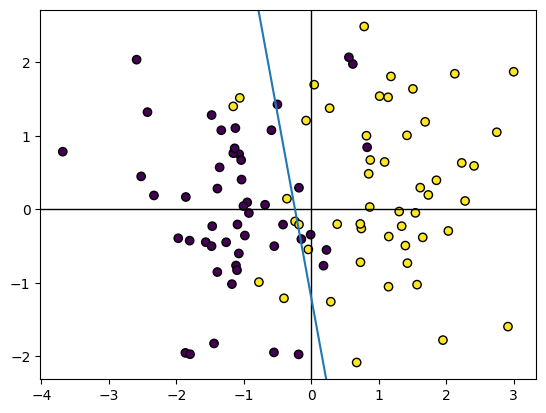

In [25]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(46)

X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)

def plotmodel(w1, w2, b):
  
  plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
           edgecolor='k')
  
  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax = plt.gca().get_ylim()
  
  x = np.linspace(-2, 4, 50)
  y = (-w1*x -b)/w2

  plt.axvline(0, -1, 1, color='k', linewidth=1)
  plt.axhline(0, -2, 4, color='k', linewidth=1)
  plt.plot(x, y, label='_nolegend_')
  
  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)
  
w1 = 5 #a
w2 = 1  #b
b  = 1.2  #c
plotmodel(w1, w2, b)

p = (-1, 1)
print(w1 * p[0] + w2 * p[1] + b)

Agora vamos instanciar uma camada Linear an√°loga √† nossa reta, ou seja:

- in_features = 2 : dimensionalidade da entrada
- out_features = 1 : dimensionalidade da sa√≠da

Vamos instanciar tamb√©m uma ativa√ß√£o sigm√≥ide para compor o nosso modelo de classifica√ß√£o. Documenta√ß√£o: https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity

Em seguida vamos substituir os pesos do perceptron com os par√¢metros da nossa reta. Para isso criaremos um objeto Parameter, o tipo de dado que camadas do PyTorch aceitam para representar os seus par√¢metros.
Documenta√ß√£o: https://pytorch.org/docs/stable/nn.html#torch.nn.Parameter


In [26]:
perceptron = nn.Linear(2, 1)
activation = nn.Sigmoid()

print(perceptron.weight.data)
print(perceptron.bias.data)

perceptron.weight = nn.Parameter(torch.Tensor([[w1, w2]]))
perceptron.bias   = nn.Parameter(torch.Tensor([b]))

print(perceptron.weight.data)
print(perceptron.bias.data)
     


tensor([[-0.1549,  0.1427]])
tensor([-0.3443])
tensor([[5., 1.]])
tensor([1.2000])


Temos portanto:

- uma distribui√ß√£o de pontos com duas classes linearmente separ√°veis
- um modelo linear de classifica√ß√£o bin√°ria, empiricamente definido, que inclui uma fun√ß√£o de ativa√ß√£o sigm√≥ide.

Agora vamos ver a diferen√ßa entre o resultado apresentado pelo perceptron antes e depois da fun√ß√£o de ativa√ß√£o. Para isso, selecionei empiricamente alguns pontos da distribui√ß√£ (√≠ndices 17, 21, 43 e 66) que nos ajudar√£o a entender o impacto da sigm√≥ide.


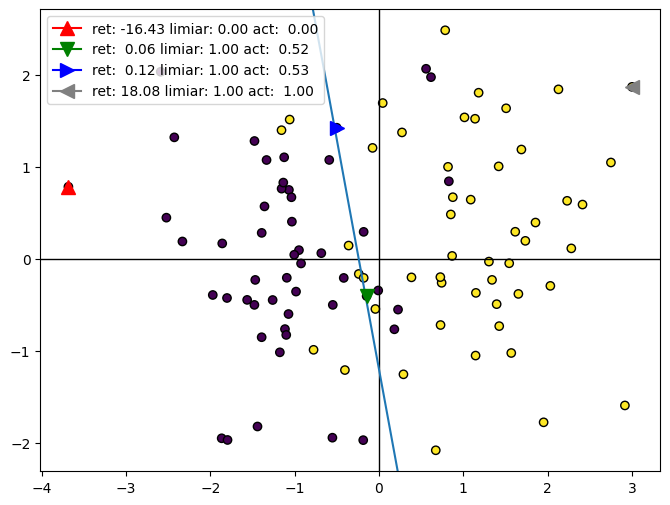

In [27]:
markers = ['^', 'v', '>', '<']
colors = ['r', 'g', 'b', 'gray']

plt.figure(figsize=(8, 6))
plotmodel(w1, w2, b)
for k, idx in enumerate([17, 21, 43, 66]):
  x = torch.Tensor(X[idx])
  
  ret = perceptron(x)
  act = activation(ret)
  
  act_limiar = 0 if ret.data < 0 else 1
  
  label = 'ret: {:5.2f}'.format(ret.data.numpy()[0]) + ' limiar: {:4.2f}'.format(act_limiar) + ' act: {:5.2f}'.format(act.data.numpy()[0])
  plt.plot(x[0], x[1], marker=markers[k], color=colors[k], markersize=10, label=label)
  
plt.legend()
plt.show()

Com a sigmoid, elementos na fronteira de decis√£o recebem o valor 0.5, indicando baixa certeza sobre a classe desses elementos. Quanto mais afasta da zona de confus√£o, maior a certeza da classifica√ß√£o (seja para 0, ou para 1).

Podemos experimentar diferentes fun√ß√µes de ativa√ß√£o e ver como elas nos ajudam a interpretar a sa√≠da do perceptron.


In [28]:
# Descomente uma das linhas abaixo e rode novamente a c√©lula anterior

activation = nn.ReLU()
# activation = nn.Tanh()
     


# Definindo uma Arquitetura no PyTorch


## Carregando dados

Exemplo de dados n√£o-linearmente separ√°veis (distribui√ß√£o em lua):
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html


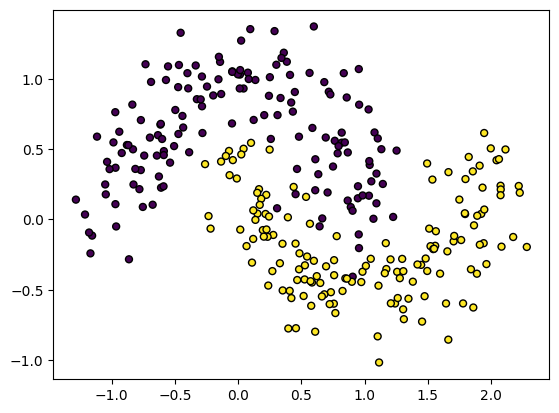

In [29]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X1, Y1 = make_moons(n_samples=300, noise=0.2)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', 
 c=Y1, s=25, edgecolor='k')
     


## nn.Sequential

O m√≥dulo nn.Sequential √© um container onde se pode colocar m√∫ltiplos m√≥dulos. Ao realizar um forward em um objeto Sequential ele aplicar√° sequencialmente os m√≥dulos nele contidas para gerar uma sa√≠da.

Segue abaixo um exemplo desse m√≥dulo contendo 2 camadas Linear intercaladas por uma fun√ß√£o de ativa√ß√£o ReLU.


In [30]:
import torch
from torch import nn # neural networks

input_size = 2
hidden_size = 8
output_size = 1

net = nn.Sequential(nn.Linear(in_features=input_size, out_features=hidden_size), # hidden (escondida)
                    nn.ReLU(),   # ativa√ß√£o n√£o linear
                    nn.Linear(in_features=hidden_size, out_features=output_size)) # output (sa√≠da)
print(net)
     


Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)


Para mais informa√ß√µes, acesse: https://github.com/sksq96/pytorch-summary

In [31]:
from torchsummary import summary

summary(net, input_size=(1, input_size))
     


Layer (type:depth-idx)                   Param #
‚îú‚îÄLinear: 1-1                            24
‚îú‚îÄReLU: 1-2                              --
‚îú‚îÄLinear: 1-3                            9
Total params: 33
Trainable params: 33
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
‚îú‚îÄLinear: 1-1                            24
‚îú‚îÄReLU: 1-2                              --
‚îú‚îÄLinear: 1-3                            9
Total params: 33
Trainable params: 33
Non-trainable params: 0

## Forward

## Classe nn.Module

A forma mais organizada de definir modelos em PyTorch √© implementando uma classe nos moldes da classe nn.Module. Para redes pequenas, como as que estamos aprendendo at√© o momento, sua import√¢ncia pode n√£o se destacar, mas modelos maiores e com funcionalidades mais complexas, s√£o mais f√°ceis de implementar e realizar manuten√ß√µes dessa forma.

Fun√ß√µes obrigat√≥rias do nn.Module.

- __init()__: defini√ß√£o de hiperpar√¢metros e inst√¢ncia do modelo
- forward(): Fluxo da entrada para produzir uma sa√≠da



In [32]:
class MinhaRede(nn.Module):
  
  def __init__(self, input_size, hidden_size, output_size):
    super(MinhaRede, self).__init__()
    
    # Definir a arquitetura
    self.hidden = nn.Linear(input_size, hidden_size)
    self.relu   = nn.ReLU()
    self.output = nn.Linear(hidden_size, output_size)
    
  def forward(self, X):
    
    # Gerar uma sa√≠da a partir do X
    hidden = self.relu(self.hidden(X))
    output = self.output(hidden)
    
    return output
     


Instanciando a rede

In [33]:
input_size = 2
hidden_size = 8
output_size = 1

net = MinhaRede(input_size,hidden_size, output_size)  ## O m√©todo __init__()
print(net)
     


MinhaRede(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
)


## Forward

In [34]:
print(X1.shape)
tensor = torch.from_numpy(X1).float()
pred   = net(tensor)
print(pred.size())
     


(300, 2)
torch.Size([300, 1])


## Subindo informa√ß√µes na GPU

Para conseguir executar modelos maiores em tempo h√°bil, √© preciso carregar as informa√ß√£o na GPU para que o processamento seja realizado por ela. Dentre as informa√ß√µes que conhecemos at√© o momento, duas delas precisam ser carregadas ba GPU:

- Entrada
- Rede

A c√©lula a seguir cont√©m a implementa√ß√£o sugerida para realizar esse processo.
Se certifique que o notebook est√° na configura√ß√£o desejada (CPU/GPU). Para isso, basta acessar Edit -> Notebook Settings e definir o hardware desejado.

# Fun√ß√µes de Perda


## Classifica√ß√£o

In [92]:
import torch
from torch import nn     

O m√≥dulo nn e suas 1001 utilidades, tamb√©m fornece as implementa√ß√µes das principais fun√ß√µes de perda. Ent√£o vamos primeiro importar o torch e o m√≥dulo nn



Vamos trabalhar com o dataset de classifica√ß√£o de vinhos.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html


In [93]:
from sklearn import datasets

wine = datasets.load_wine()
data = wine.data
target = wine.target

print(data.shape, target.shape)
print(wine.feature_names, wine.target_names)
     


(178, 13) (178,)
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'] ['class_0' 'class_1' 'class_2']


Vamos instanciar um MLP com uma camada escondida e uma camada de sa√≠da. 

In [94]:

class WineClassifier(nn.Module):

  def __init__(self, input_size, hidden_size, out_size):
    super(WineClassifier, self).__init__()

    self.hidden  = nn.Linear(input_size, hidden_size)
    self.relu    = nn.ReLU()
    self.out     = nn.Linear(hidden_size, out_size)
    self.softmax = nn.Softmax()

  def forward(self, X):
    
    feature = self.relu(self.hidden(X))
    output  = self.softmax(self.out(feature))

    return output

input_size  = data.shape[1]
hidden_size = 32
out_size    = len(wine.target_names)

net = WineClassifier(input_size, hidden_size, out_size).to(device) #cast na GPU 

In [95]:
print(net)

WineClassifier(
  (hidden): Linear(in_features=13, out_features=32, bias=True)
  (relu): ReLU()
  (out): Linear(in_features=32, out_features=3, bias=True)
  (softmax): Softmax(dim=None)
)


Classifica√ß√£o

O primeiro passo √© instanciar a fun√ß√£o de perda de sua escolha. Trata-se de um problema de classifica√ß√£o com 3 classes, nesse caso a Cross Entropy √© a fun√ß√£o recomendada, que no PyTorch recebe o nome de CrossEntropyLoss: https://pytorch.org/docs/stable/nn.html#crossentropyloss

Assim como a rede, as entradas e os r√≥tulos, a fun√ß√£o de perda tamb√©m deve ser carregada na GPU


In [96]:
criterion = nn.CrossEntropyLoss().to(device) # cast na GPU

Antes de aplicar a fun√ß√£o de perda, vamos fazer o cast dos dados para tensores e extrair as predi√ß√µes y' da rede.

In [97]:
Xtns = torch.from_numpy(data).float() #dados 
Ytns = torch.from_numpy(target).long()  # Convert to LongTensor for target labels

# Cast na GPU
Xtns = Xtns.to(device)
Ytns = Ytns.to(device)

print(Xtns.dtype, Ytns.dtype)
     


torch.float32 torch.int64


In [98]:
pred = net(Xtns)

pred.shape

C:\Users\Anacleto\AppData\Local\Temp\ipykernel_8004\3449205414.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output  = self.softmax(self.out(feature))


torch.Size([178, 3])

Confira as dimens√µes de y e y'. Enquanto as predi√ß√µes est√£o em termos de probabilidades, os r√≥tulos de classifica√ß√£o devem s√£o valores inteiros referentes aos √≠ndices das classes

In [99]:
print(pred.shape, Ytns.shape)

print(pred[0].data, Ytns[0].data)

torch.Size([178, 3]) torch.Size([178])
tensor([6.2234e-18, 1.0000e+00, 0.0000e+00]) tensor(0)




As fun√ß√µes de perda implementadas no PyTorch esperam o seguinte padr√£o de chamada:

loss = criterion(prediction, target)

Vale lembrar que cada fun√ß√£o de perda possui especificidades quanto √†s dimens√µes dos seus par√¢metros. Para a Cross Entropy:

- prediction: (N, C)
- target: (N,)



In [100]:
loss = criterion(pred, Ytns)
print(loss)
     

tensor(1.1526, grad_fn=<NllLossBackward0>)


## Regress√£o

Vamos trabalhar com o dataset de Diabetes, cujo objetivo √© prever a progress√£o da diabetes em um paciente.

https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset



In [101]:
from sklearn import datasets

diabetes = datasets.load_diabetes()
data = diabetes.data
target = diabetes.target

print(data.shape, target.shape)

print(data[14])
print(target[14])

(442, 10) (442,)
[ 4.53409833e-02 -4.46416365e-02 -2.56065715e-02 -1.25561242e-02
  1.76943802e-02 -6.12835791e-05  8.17748397e-02 -3.94933829e-02
 -3.19876395e-02 -7.56356220e-02]
118.0


Implementando o MLP

In [102]:
class DiabetesClassifier(nn.Module):

  def __init__(self, input_size, hidden_size, out_size):
    super(DiabetesClassifier, self).__init__()

    self.hidden  = nn.Linear(input_size, hidden_size)
    self.relu    = nn.ReLU()
    self.out     = nn.Linear(hidden_size, out_size)
    self.softmax = nn.Softmax(dim=-1)

  def forward(self, X):
    
    feature = self.relu(self.hidden(X))
    output  = self.softmax(self.out(feature))

    return output

input_size  = data.shape[1]
hidden_size = 32
out_size    = 1  # Progress√£o da diabetes

net = DiabetesClassifier(input_size, hidden_size, out_size).to(device) #cast na GPU 

Para solucionar problemas de regress√£o, as fun√ß√µes de perda correspondentes esperam que ambos o r√≥tulo e a predi√ß√£o tenham a mesma dimensionalidade. N√£o se trata mais de um problema categ√≥rico.

Portanto, vamos simular um problema de regress√£o e aplicar a MSELoss
Documenta√ß√£o: https://pytorch.org/docs/stable/nn.html#mseloss


In [103]:
criterion = nn.MSELoss().to(device)

# Cast na GPU
Xtns = torch.from_numpy(data).float().to(device)
Ytns = torch.from_numpy(target).float().to(device)

print(Xtns.shape, Ytns.shape)
     


torch.Size([442, 10]) torch.Size([442])


In [104]:
pred = net(Xtns)

loss = criterion(pred.squeeze(), Ytns)
print(loss.data)
     


tensor(28771.2148)


In [105]:
criterion = nn.L1Loss().to(device)

pred = net(Xtns)

loss = criterion(pred.squeeze(), Ytns)
print(loss.data)

tensor(151.1335)


 Documenta√ß√£o

Veja a documenta√ß√£o para consultar a lista de todas as fun√ß√µes de perda implementadas no PyTorch:
https://pytorch.org/docs/stable/nn.html#loss-functions


# Otimiza√ß√£o

Para entender o processo de otimiza
√ß√£o, vamos utilizar um dataset de classifica√ß√£o de vinhos. A classifica√ß√£o √© feita com base em an√°lises qu√≠micas realizadas em tr√™s diferentes cultivos na mesma regi√£o da It√°lia.

O carregamento dos dados est√° descrito na documenta√ß√£o do Scikit-Learn:
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

Dentre os 13 atributos do dataset, selecionamos 2 para facilitar a visualiza√ß√£o dos resultados:

    Teor Alco√≥lico: √≠ndice 0
    Intensidade da cor: √≠ndice 9



## Primeiro devemos realizar a padroniza√ß√£o dos dados

Um pr√©-processamento extremamente importante nesse caso √© a padroniza√ß√£o dos valores de entrada. Como as caracter√≠sticas variam em intervalos diferentes (cor: [1, 13], √°lcool: [11, 15]), elas v√£o exercer diferentes influ√™ncias sobre o nosso modelo e prejudicar muito a sua converg√™ncia.


['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


Text(0, 0.5, 'color_intensity')

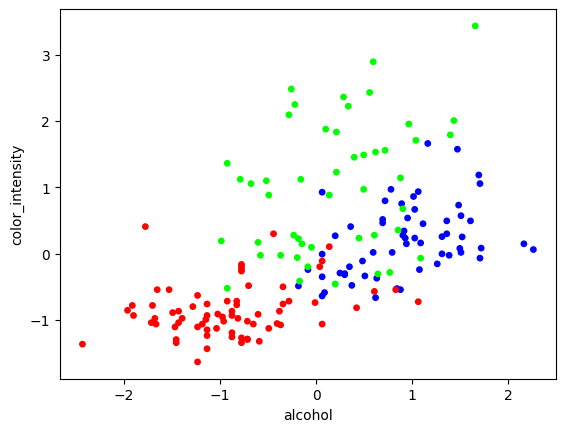

In [109]:
from sklearn import datasets
import matplotlib.pyplot as plt

features = [0, 9]

wine = datasets.load_wine()
data = wine.data[:, features]
targets = wine.target

scaler = StandardScaler()
data = scaler.fit_transform(data)

print(wine.feature_names)

plt.scatter(data[:, 0], data[:,1], c=targets, s=15, cmap=plt.cm.brg)
plt.xlabel(wine.feature_names[features[0]])
plt.ylabel(wine.feature_names[features[1]])
     


## Instanciando sua rede

Antes de entrar nas nuances da otimiza√ß√£o, vamos fazer o que j√° sabemos: instanciar um MLP de duas camadas neurais, uma escondida e outra de sa√≠da.

Lembre-se de definir o dispositivo de hardware (cuda ou cpu) antes de iniciar os trabalhos.


In [110]:
print(device) #imprime se e cpu ou gpu

input_size  = data.shape[1]
hidden_size = 32
out_size    = len(wine.target_names) # numero de classes 

net = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, out_size),
    nn.Softmax()
)

net = net.to(device)

cpu


## Visualizando a fronteira de decis√£o

Para facilitar o entendimento do processo de otimiza√ß√£o, vamos utilizar uma fun√ß√£o auxiliar para visualizar a fronteira de decis√£o da nossa rede neural de classifica√ß√£o. Como acabamos de instanci√°-la, seus pesos modelam uma fun√ß√£o aleat√≥ria que n√£o se ajusta adequadamente aos dados, e isso √© facilmente vis√≠vel em duas dimens√µes.

Adaptada de:
https://github.com/camilalaranjeira/Neural-Lectures/blob/master/XOR_Problem.ipynb


In [111]:
import numpy as np 

def plot_boundary(X, y, model):
  x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
  y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
  
  spacing = min(x_max - x_min, y_max - y_min) / 100
  
  XX, YY = np.meshgrid(np.arange(x_min, x_max, spacing),
                       np.arange(y_min, y_max, spacing))
  
  data = np.hstack((XX.ravel().reshape(-1,1), 
                    YY.ravel().reshape(-1,1)))
  
  # For binary problems
  # db_prob = model(Variable(torch.Tensor(data)).cuda() )
  # clf = np.where(db_prob.cpu().data < 0.5,0,1)
  
  # For multi-class problems
  db_prob = model(torch.Tensor(data).to(device) )
  clf = np.argmax(db_prob.cpu().data.numpy(), axis=-1)
  
  Z = clf.reshape(XX.shape)
  
  plt.contourf(XX, YY, Z, cmap=plt.cm.brg, alpha=0.5)
  plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', s=25, cmap=plt.cm.brg)
     


C:\Users\Anacleto\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


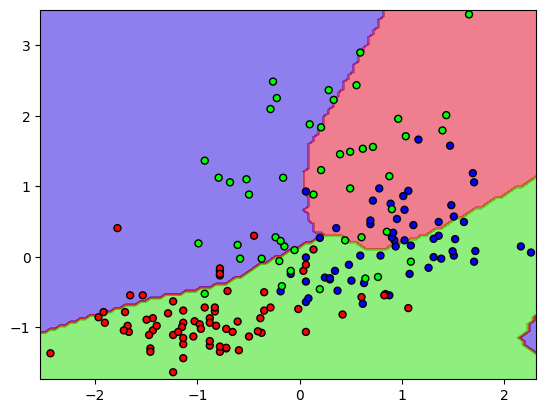

In [112]:
plot_boundary(data, targets, net)

## Pacote torch.optim

M√£os a obra! Vamos agora otimizar a nossa rede usando os algoritmos mais tradicionais da √°rea. Para isso, a biblioteca torch.optim nos ser√° bem √∫til, pois ela implementa os principais algoritmos de otimiza√ß√£o de redes neurais.

O primeiro passo √© instanciar o otimizador. De acordo com o pacote optim, basta chamar o otimizador escolhido, passando como par√¢metro:

    Os par√¢metros da rede que ser√° otimizada (net.parameters())
    A taxa de aprendizado

A depender do otimizador, pode ser necess√°rio alimentar outros par√¢metros, mas esses dois s√£o obrigat√≥rios!

Vamos utilizar a Descida do Gradiente que vimos na aula te√≥rica, implementada pelo otimizador optim.SGD (Stochastic Gradient Descent).


In [116]:
from torch import optim

# Fun√ß√£o de Perda
criterion = nn.CrossEntropyLoss().to(device)

# Otimizador: Descida do Gradiente
# Stochastic Gradient Descent
optimizer = optim.SGD(net.parameters(), lr=1e-3)
     

## Hiperpar√¢metros

    Valores definidos antes do in√≠cio do aprendizado
    Devem ser ajustados para cada tarefa espec√≠fica

A taxa de aprendizado n√£o √© o primeiro hiperpar√¢metro que temos contato. Ao definir a arquitetura da sua rede (quantos neur√¥nios e quantas camadas) voc√™ tamb√©m teve que escolher um valor adequado. Essa escolha pode ser emp√≠rica, mas em geral deve ser experimental, na busca pelo melhor conjunto de hiperpar√¢metros para solucionar o seu problema!

    üêº Emp√≠rica (Abordagem do Panda): O programador investe seus esfor√ßos em um √∫nico modelo (um beb√™ panda), e altera os hiperpar√¢metros com base na sua experi√™ncia e nas observa√ß√µes
    üíª Experimental: M√∫ltiplos modelos s√£o gerados simultaneamente, com diferentes combina√ß√µes de hiperpar√¢metros. Dentre eles, √© escolhido o que apresentar melhor performance.



## Cast do dados

Os dados carregados do Scikit-Learn s√£o retornados como ndarrays, por isso precisamos convert√™-los para tensores e carreg√°-los na GPU (caso dispon√≠vel) antes de alimentar o modelo neural.


In [114]:
X = torch.FloatTensor(data).to(device) # GPU
Y = torch.LongTensor(targets).to(device)

## Treinando um modelo

O treinamento consiste nas etapas que vimos na aula te√≥rica. Aqui vamos relacionar cada etapa ao seu c√≥digo correspondente.

    Forward
        - Alimentar os dados para a rede
    pred = net(X)
        - Calcular a fun√ß√£o de custo
    loss = criterion(pred, y)
    Backpropagation
        - Calcular o gradiente
    loss.backward()
        - Atualizar os pesos
    optimizer.step()

A princ√≠pio n√£o vamos falar de procedimentos adequados de treinamento. Vamos apenas realizar as etapas de treinamento e ver o que acontece.


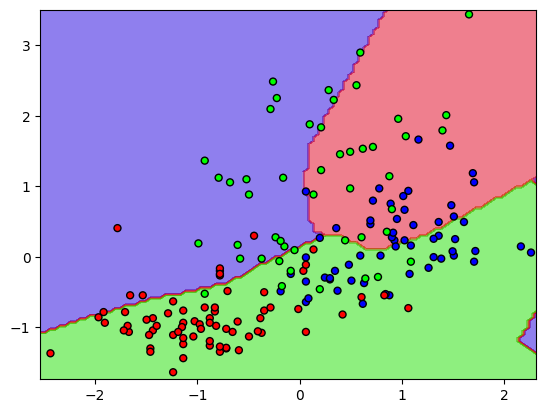

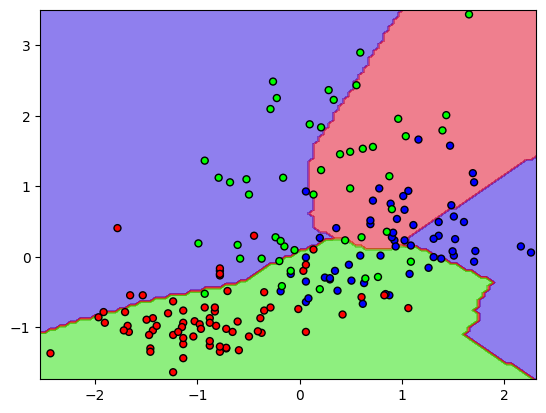

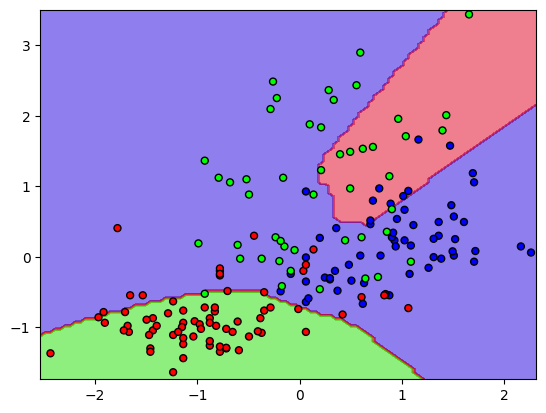

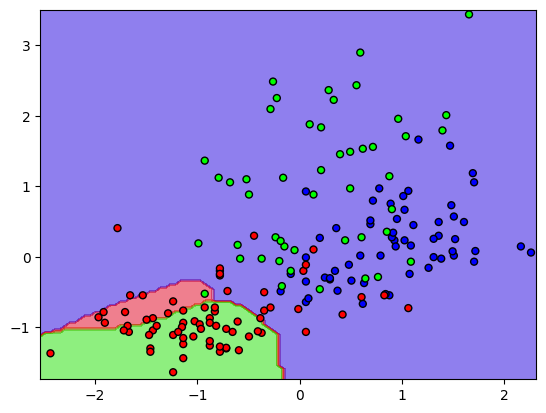

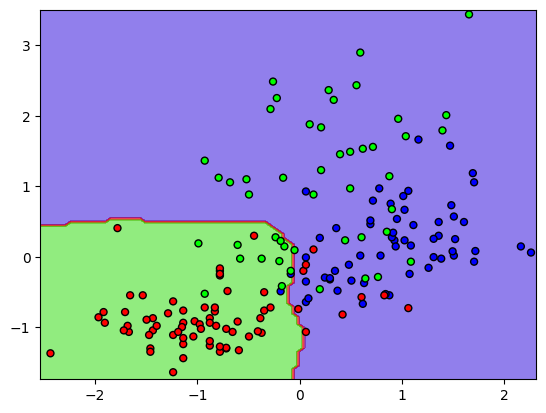

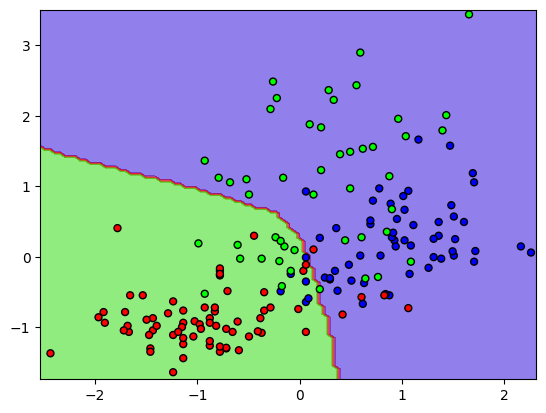

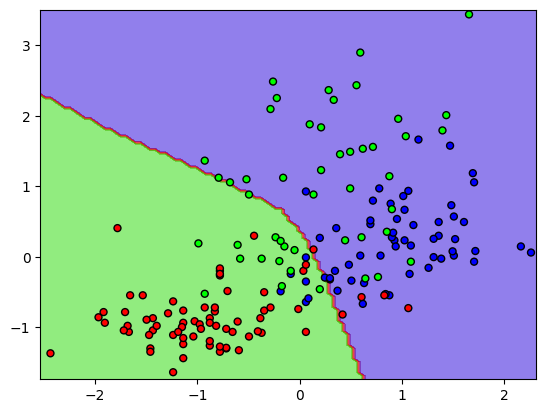

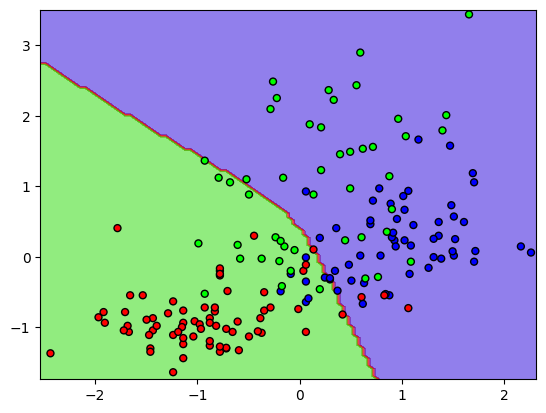

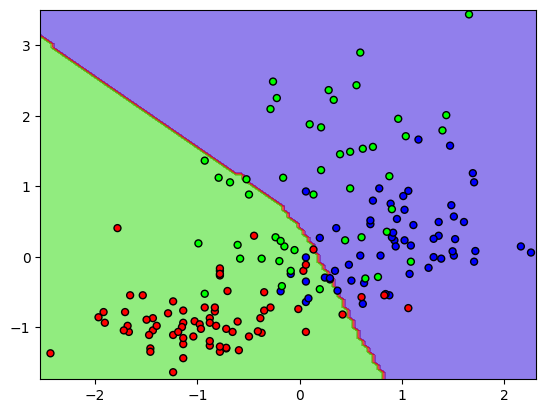

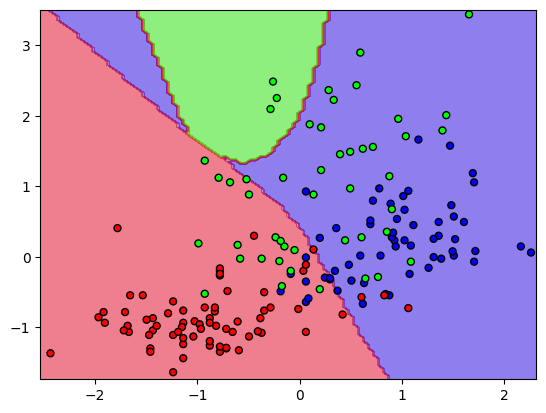

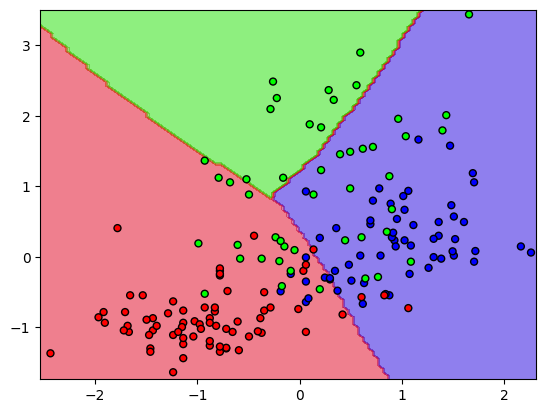

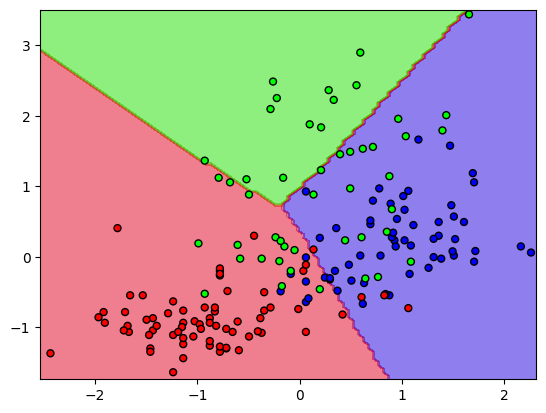

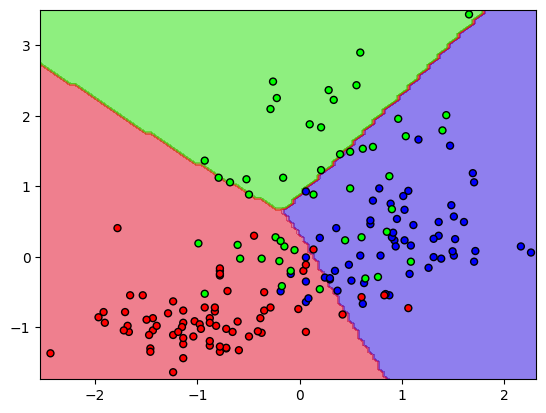

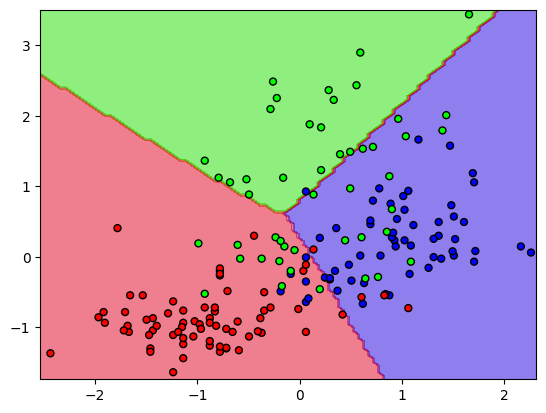

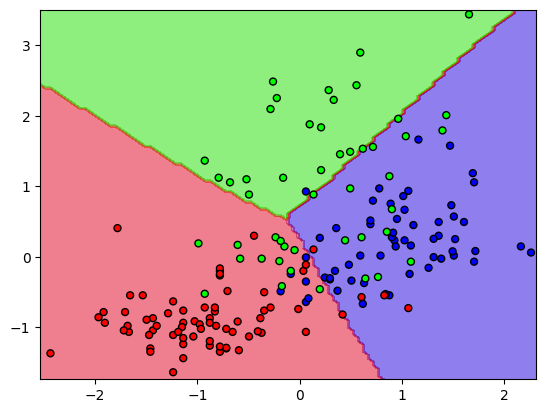

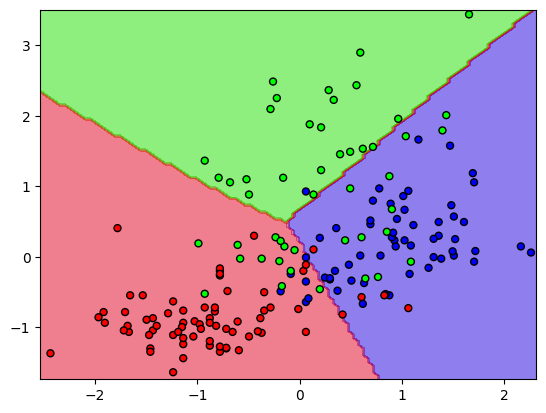

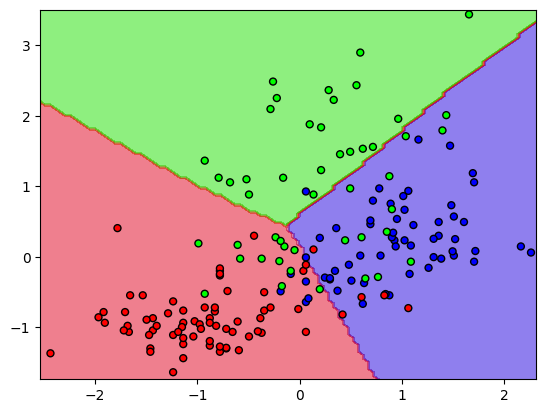

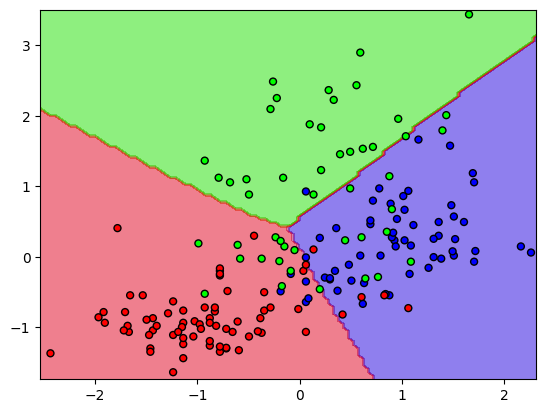

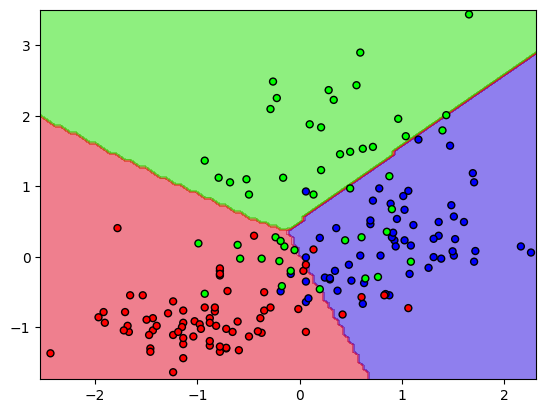

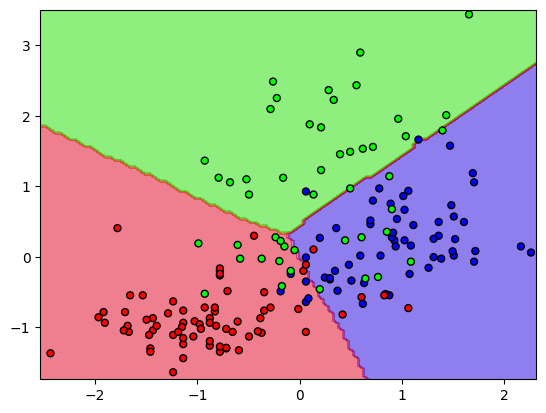

In [115]:
for i in range(200):
  # Forward 
  pred = net(X)
  loss = criterion(pred, Y)

  # Backward
  loss.backward()
  optimizer.step()

  if i % 10 == 0:
    plt.figure()
    plot_boundary(data, targets, net)
     